<!--NAVIGATION-->
< [In Depth: MDP Wikipedia example](MDP-wikipedia.ipynb) | [In-Dept: MDP Exercise](MDP-2.ipynb) >



# Regresión lineal

Un buen punto de partida para las tareas de clasificación, los modelos de regresión lineal son un buen punto de partida para las tareas de regresión.
Tales modelos son populares porque pueden ajustarse muy rápidamente y son muy interpretables.

Importemos librerias:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Regresión lineal simple

Sistema de regresión mas popular:
Definida como:
$$
y = ax + b
$$
donde $a$ es la *inclinación*, y $b$ es conocido como la *intercepción*.

Considere el siguiente conjunto de datos dispersado sobre una linea con una inclinación de 2 y una intercepción en -5:

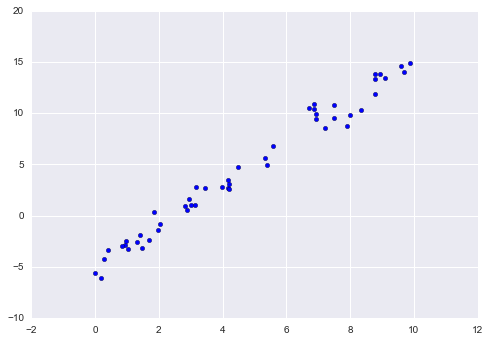

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

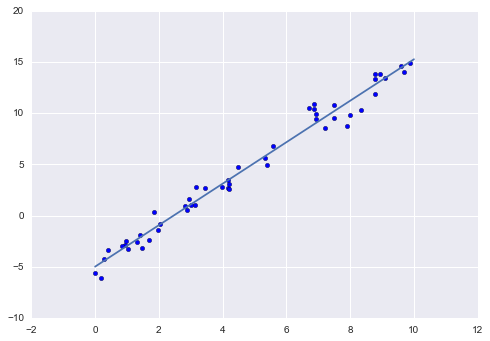

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

La inclinación y la intercepción de los datos pertenecen en los parametros del modelo por parte de la libreria *Scikit-Learn*.
Los parametros se visualizan con los siguientes comandos ``coef_`` y ``intercept_``:

In [4]:
print("Inclinacion del modelo:    ", model.coef_[0])
print("Intercepción del modelo:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


``LinearRegression`` es mas poderoso que una *linea recta*. Maneja modelos lineales multidimensionales de la forma:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
Donde hay multiplos de valores de valores de $x$.

multidimensionalmente, la regresión se dificulta para visualizar,  pero podemos observar los coeficientes mas optimos para ese modelo:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


## Funciones basicas polinomiales

Para adaptar la regressión lineal a relaciones no lineales entre variables es usando ``PolynomialRegression``
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
Construimos $x_1, x_2, x_3,$ etc, desde nuestra entrada $x$.
Entonces $x_n = f_n(x)$, donde $f_n()$ es una función que transforma nuestros datos.

Ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte a una regresión polinial:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Podemos observar que podemos usar el modelo lineal, para clasificar relaciones mas complicadas entre $x$ y $y$. 
Por ejemplo:

<!--NAVIGATION-->
< [In Depth: MDP Wikipedia example](MDP-wikipedia.ipynb) | [In-Dept: MDP Exercise](MDP-2.ipynb) >

